#ESTUDIO DE UN PENDULO DOBLE#
Sara Alejandra Carvajal Ramirez Cc.1193090281

Para el presente proyecto se pretende hacer uso de lo visto en la materia de Métodos computaciones con el fin de plantear y simular un sistema de pendulo doble, para ello es importante hacer uso de la teoría vista sobre graficación, simulación y ecuaciones diferenciales [Imagen del pendulo doble]()
Para este sistema se considerarán dos masas $M_{1}$ y $M_{2}$ cada una sujeta a una cuerda de masa $M_{c1}$ y $M_{c2}$, de longitud $L_{c1}$ y $L_{c2}$ respectivamente, es posible decir que el sistema de pendulo doble esta compuesto por dos pendulos simples unidos.

El movimiento de este sistema es gobernado principalmente por dos ecuaciones diferenciales ordinarias acopladas.

Puede consultar más sobre este estudio [aqui](http://www.sc.ehu.es/sbweb/fisica3/oscilaciones/pendulo_doble/pendulo_doble.html)

Variables a tener en cuenta para describir el sistema dinámico: 


*   $x$,$y$ posición horizontal y vertical de la masa del pendulo respectivamente  
*   $Θ1,Θ2$ Ángulo del pendulo con respecto a su vertical correspondientemente 
*   $l1,l2$ Longitudes de la cuerda 1 y la cuerda 2 correspondientemente
*   $m1,m2$ Masa 1 y Masa 2 presentes en la configuración

*tomando como marco el subindice 1 para la parte superior del sistema y el subindice 2 la parte inferior del mismo*

Las ecuaciones de movimiento que se usarán son extraídas de la pagina que aparece como consulta.

In [21]:
"""Se importan las librerias con las cuales se trabajará, para ello se hace uso
de numpy (Libreria numerica), scipy para resolver la ecuación diferencial y 
Matplotlib para graficación"""
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

In [14]:
g = 9.8
 
class pendulodoble(object):
  def __init__(self,m1,m2,l1,l2):
    self.m1,self.m2,self.l1,self.l2= m1,m2,l1,l2
    self.iniciales= np.array([0,0,0,0])

  def ecuacion(self,parameters,t):
    theta1, theta2, v1, v2 = parameters
    dtheta1 = v1
    dtheta2 = v2
    """La derivada de V1 corresponde a (A+B)dv1= -C  y la derivada de V2 es 
    (D+F)dv2= -F
    Haciendo uso de las ecuaciones para Theta1;
    """
    A = self.l1*self.l1*(self.m1+self.m2)
    B = self.l1*self.m2*self.l2*np.cos(theta1-theta2)
    C = self.l1*(self.m2*self.l2*np.sin(theta1-theta2)*dtheta2*dtheta2 + (self.m1+self.m2)*g*np.sin(theta1))
    #Haciendo uso de las ecuaciones para Theta2
    D = self.m2*self.l2*self.l1*np.cos(theta1-theta2) 
    E = self.m2*self.l2*self.l2 
    F = self.m2*self.l2*(-self.l1*np.sin(theta1-theta2)*dtheta1*dtheta1 + g*np.sin(theta2))
    
    """Para hallar las soluciones de las segundas derivadas es necesario resolver
    el sistema"""
    dv1, dv2 = np.linalg.solve([[A,B],[D,E]],[-C,-F])
    
    return np.array([dtheta1, dtheta2, dv1, dv2])
 
def edopendoble(fun, t1, t2, t3):
    """Realizando la solución de la ecuación diferencial, le proporcionamos al sistema
    la función con la cuál se pretende trabajar y las condiciones iniciales ingresadas"""
    t = np.linspace(t1, t2, t3)
    dif = odeint(fun.ecuacion, fun.iniciales, t)
    l1, l2 = fun.l1, fun.l2
    x1 = l1*np.sin(dif[:,0])
    y1 = -l1*np.cos(dif[:,0])
    x2 = x1 + l2*np.sin(dif[:,1])
    y2 = y1 - l2*np.cos(dif[:,1])
    return [x1, y1, x2, y2]


In [19]:
"""Modificando los parametros iniciales de los ángulos en el sistema inicial
  Analizando el comportamiento de ambas masas con respecto al tiempo"""


a= int(input("Ingrese tiempo inicial: "))
b= int(input("Ingrese tiempo final: "))
theta1= int(input("Ingrese ángulo inicial de m1: "))
theta2= int(input("Ingrese ángulo inicial de m2: "))
m1= int(input("Ingrese masa 1: "))
l1= int(input("Ingrese longitud de masa 1: "))
m2= int(input("Ingrese masa 2: "))
l2= int(input("Ingrese longitud masa 2: "))

t=np.linspace(a,b,1000)
sistema = pendulodoble(m1, m2, l1, l2)
sistema.iniciales[:2] = theta1, theta2
x1, y1, x2, y2 = edopendoble(sistema, a,b, 1000)



Ingrese tiempo inicial: 4
Ingrese tiempo final: 40
Ingrese ángulo inicial de m1: 2
Ingrese ángulo inicial de m2: 20
Ingrese masa 1: 1
Ingrese longitud de masa 1: 20
Ingrese masa 2: 2
Ingrese longitud masa 2: 10


La posición de ambas masas con respecto al eje X es:


<Figure size 432x288 with 0 Axes>

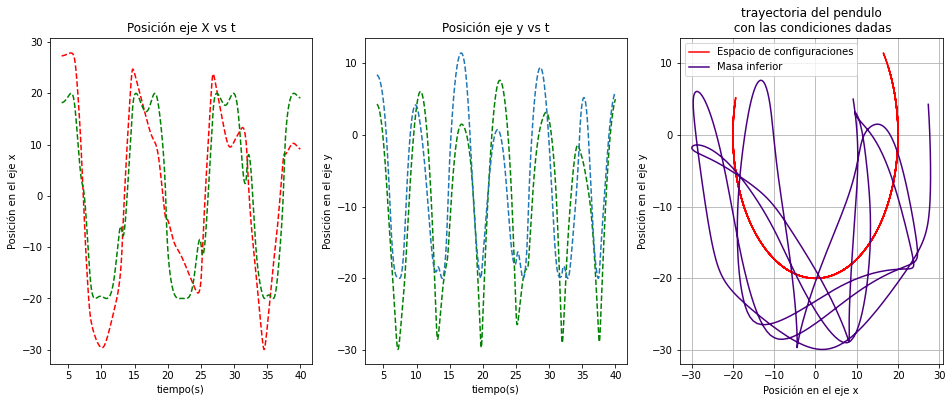

In [20]:
"""A continuación se procede a gráficar los elementos que se pueden extraer del
análisis matemático anteriormente realizado"""


print("La posición de ambas masas con respecto al eje X es:")
fig1 = plt.figure()
fig1,ax= plt.subplots(nrows=1, ncols=3, figsize=(16,6))
ax[0].plot(t,x2,"r--",label="Masa 2")
ax[0].set_title("Posición eje X vs t")
ax[0].set_xlabel("tiempo(s)")
ax[0].set_ylabel("Posición en el eje x")
ax[0].plot(t,x1,"g--",label="Masa 1")

ax[1].plot(t,y2,"g--",label="Masa 2")
ax[1].set_title("Posición eje y vs t")
ax[1].set_xlabel("tiempo(s)")
ax[1].set_ylabel("Posición en el eje y")
ax[1].plot(t,y1,"--",label="Masa 1")


ax[2].plot (x1, y1, "r-", label="Espacio de configuraciones")
plt.xlabel("Posición en el eje x")
plt.ylabel("Posición en el eje y")
plt.grid()
ax[2].plot (x2, y2,"indigo",label = "Masa inferior")
plt.title ( "trayectoria del pendulo\n con las condiciones dadas")
plt.legend()


plt.show()
